In [88]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
term_freq_df = pd.read_csv('term_freq_data.csv')

In [90]:
term_freq_df.head()

,word,negative,positive,total
0,aa,168,97,265
1,aaa,97,55,152
2,aaaa,45,29,74
3,aaaaa,26,12,38
4,aaaaaa,16,12,28


In [91]:
df = term_freq_df.sort_values(by='total', ascending=False)
df = df.reset_index(drop=True)

In [92]:
df.head()

,word,negative,positive,total
0,to,313185,252600,565785
1,the,257953,266161,524114
2,my,190805,125981,316786
3,it,157491,147841,305332
4,and,153985,149692,303677


# Zipf's Law

Zipf's law states that given some corpus of natural language utterances, the frequency of any word is inversely proportional to its rank in the frequency table. Thus the most frequent word will occur approximately twice as often as the second most frequent word, three times as often as the third most frequent word, etc.: the rank-frequency distribution is an inverse relation.

Suppose a word occurs f times and that in the list of word frequencies it has a certain rank, r. Then if Zipf's Law holds we have

$f = a/r^{b}$

where a and b are constants and $b ≈ 1$.

Let's see how the tweet tokens and their frequencies look on a plot

Text(0.5, 1.0, 'Top 500 tokens in tweets')

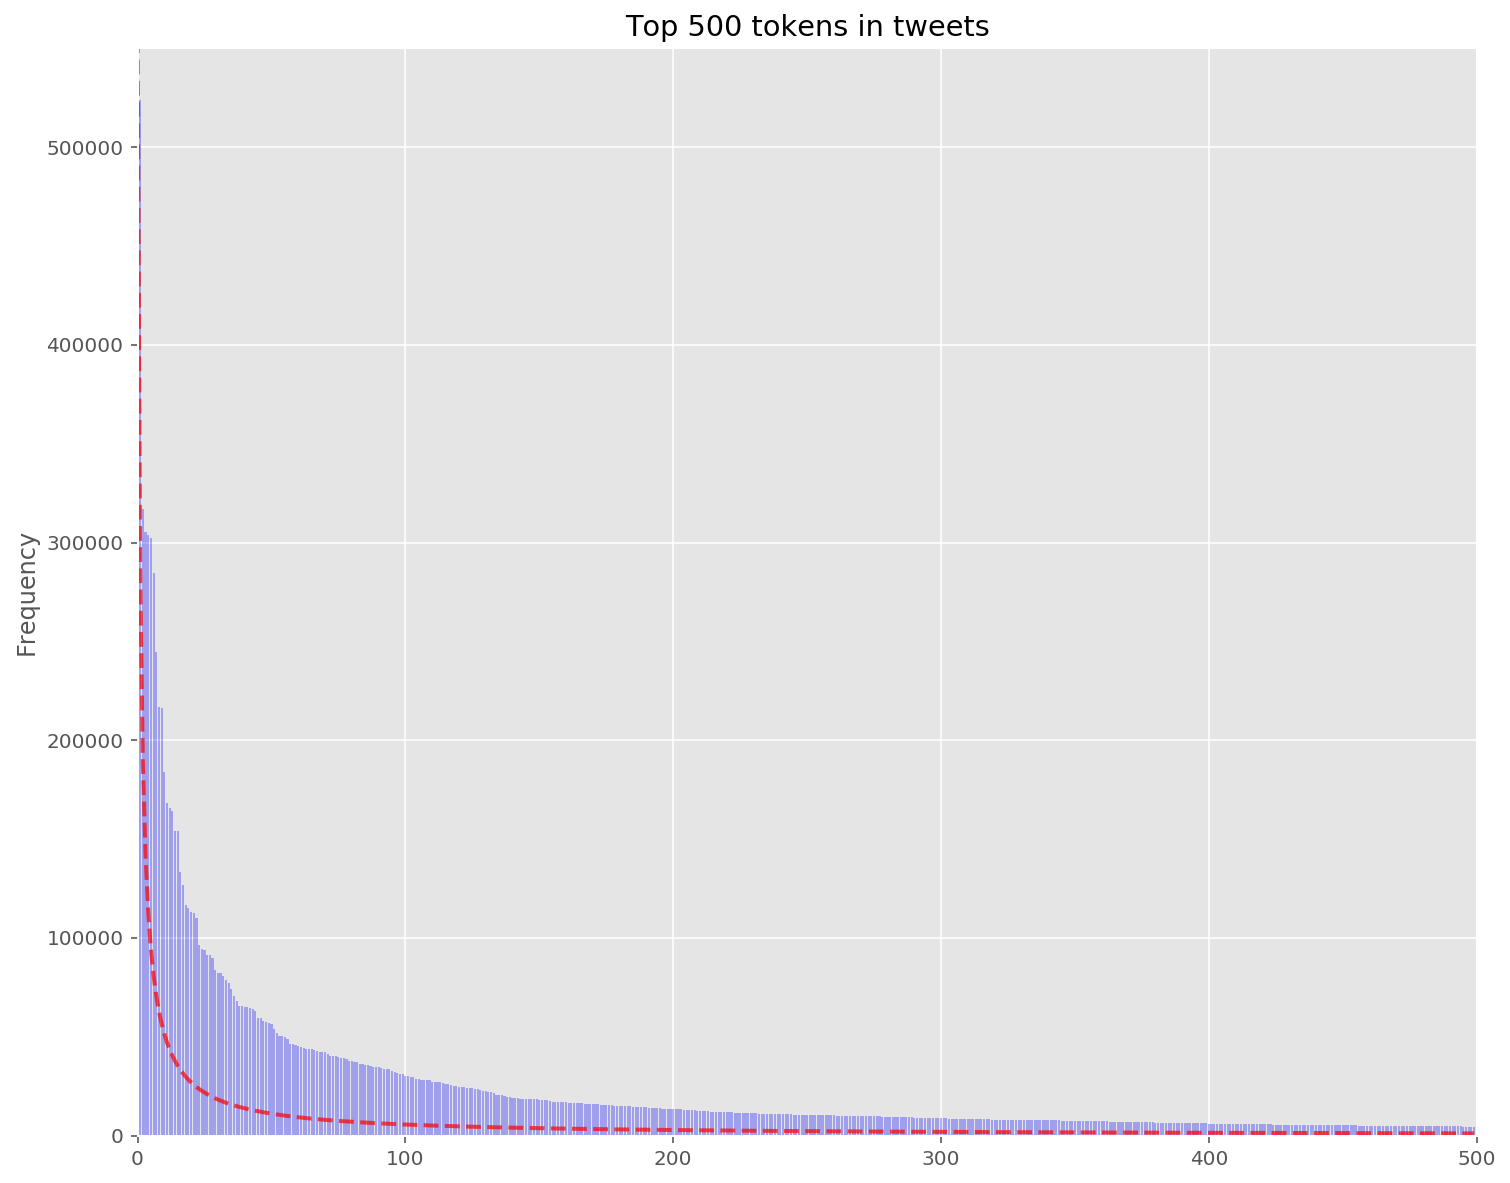

In [93]:
plt.style.use('ggplot')
y_pos = np.arange(500)
plt.figure(figsize=(12,10))
expected_zipf = [df['total'][0]/(i+1) for i in y_pos]
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.7)
plt.bar(y_pos, df['total'][:500],alpha=0.3, color='blue')
plt.xlim(0,500)
plt.ylim(0, 550000)
plt.ylabel('Frequency')
plt.title('Top 500 tokens in tweets')

On the X-axis are the top 500 tokens of the corpus with the highest rank in the left and 500th rank in the right. Y-axis consists of the frequencies of the top 500 words most frequent words in the Sentiment140 corpus.
The curve here is not the exact Zipfian curve, rather a near Zipfian distribution curve.

Even though we can see the plot follows the trend of Zipf’s Law, but it looks like it has more area above the expected Zipf curve in higher ranked words.

We can also plot a log-log graph, with X-axis being log(rank), Y-axis being log(frequency). By plotting, the result will be a roughly linear line.

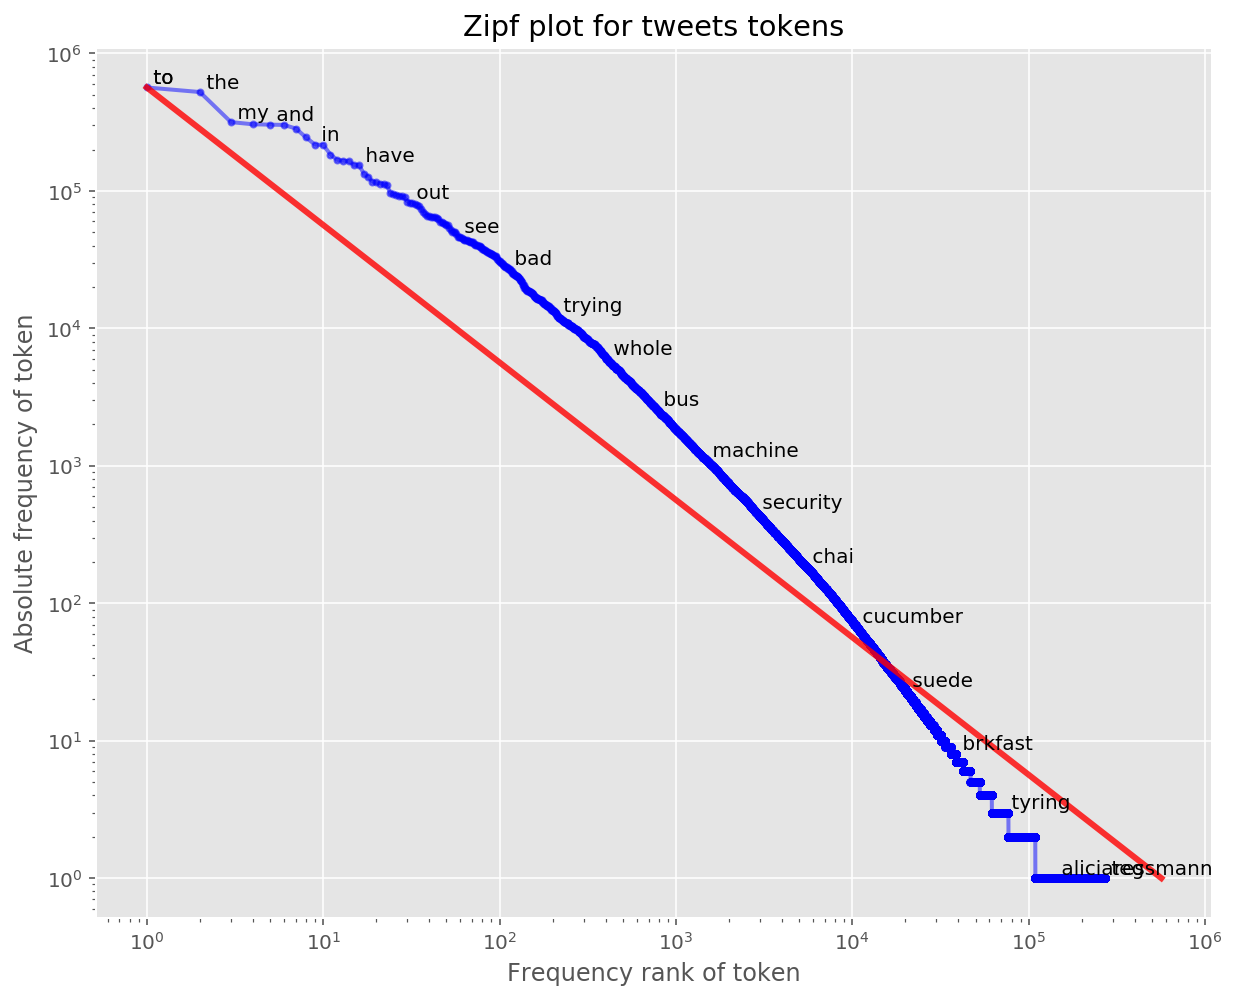

In [94]:
plt.style.use('ggplot')
counts = df['total']
tokens = df['word']
ranks = np.arange(1, len(counts)+1)
indices = np.argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(10,8))
plt.loglog(ranks, frequencies, marker=".", color='b', linewidth=2, alpha=0.5)
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r', linewidth=3, alpha=0.8)
plt.title("Zipf plot for tweets tokens")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
for n in list(np.logspace(-0.5, np.log10(len(counts)-2), 22).astype(int)):
    dummy = plt.text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom", horizontalalignment="left")

Here, we see a roughly linear curve, but deviating above the expected line on higher ranked words and deviating below the expected line on lower ranked words.

# Visualisation of tweet tokens

In [95]:
df = pd.read_csv('clean_tweets.csv')
df.drop(['Unnamed: 0'], axis=1, inplace = True)
df.dropna(inplace=True)
df['sentiment'] = df['sentiment'].map({0:0,4:1})

In [96]:
from sklearn.feature_extraction.text import CountVectorizer

In [97]:
vect = CountVectorizer(stop_words='english', max_features=10000)

In [98]:
vect.fit(df['text']) #Tokenise and build models

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [99]:
#Encode document
neg_matrix = vect.transform(df[df.sentiment==0].text)
pos_matrix = vect.transform(df[df.sentiment==1].text)

In [100]:
neg_tf = np.sum(neg_matrix, axis=0)
pos_tf = np.sum(pos_matrix, axis=0)

In [101]:
#Remove single-dimensional entries from the shape of an array
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

In [102]:
term_freq_df = pd.DataFrame([neg, pos], columns = vect.get_feature_names()).transpose()

In [103]:
term_freq_df.head()

,0,1
aa,168,97
aaa,97,55
aaaa,45,29
aaaah,76,61
aaah,160,143


In [104]:
len(term_freq_df)

10000

In [105]:
term_freq_df.columns = ['negative', 'positive']

In [106]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']

Lets see how the tokens are different in the positive and negative sentiment corpus. To do this, we removed the stopwords and limited the max_features to 10000 with CountVectorizer. After CountVectorizer, our data looks like this.

In [107]:
term_freq_df.head()

,negative,positive,total
aa,168,97,265
aaa,97,55,152
aaaa,45,29,74
aaaah,76,61,137
aaah,160,143,303


Let's see the top 50 words in negative tweets on a bar chart.

Text(0.5, 1.0, 'Top 50 tokens in negative tweets')

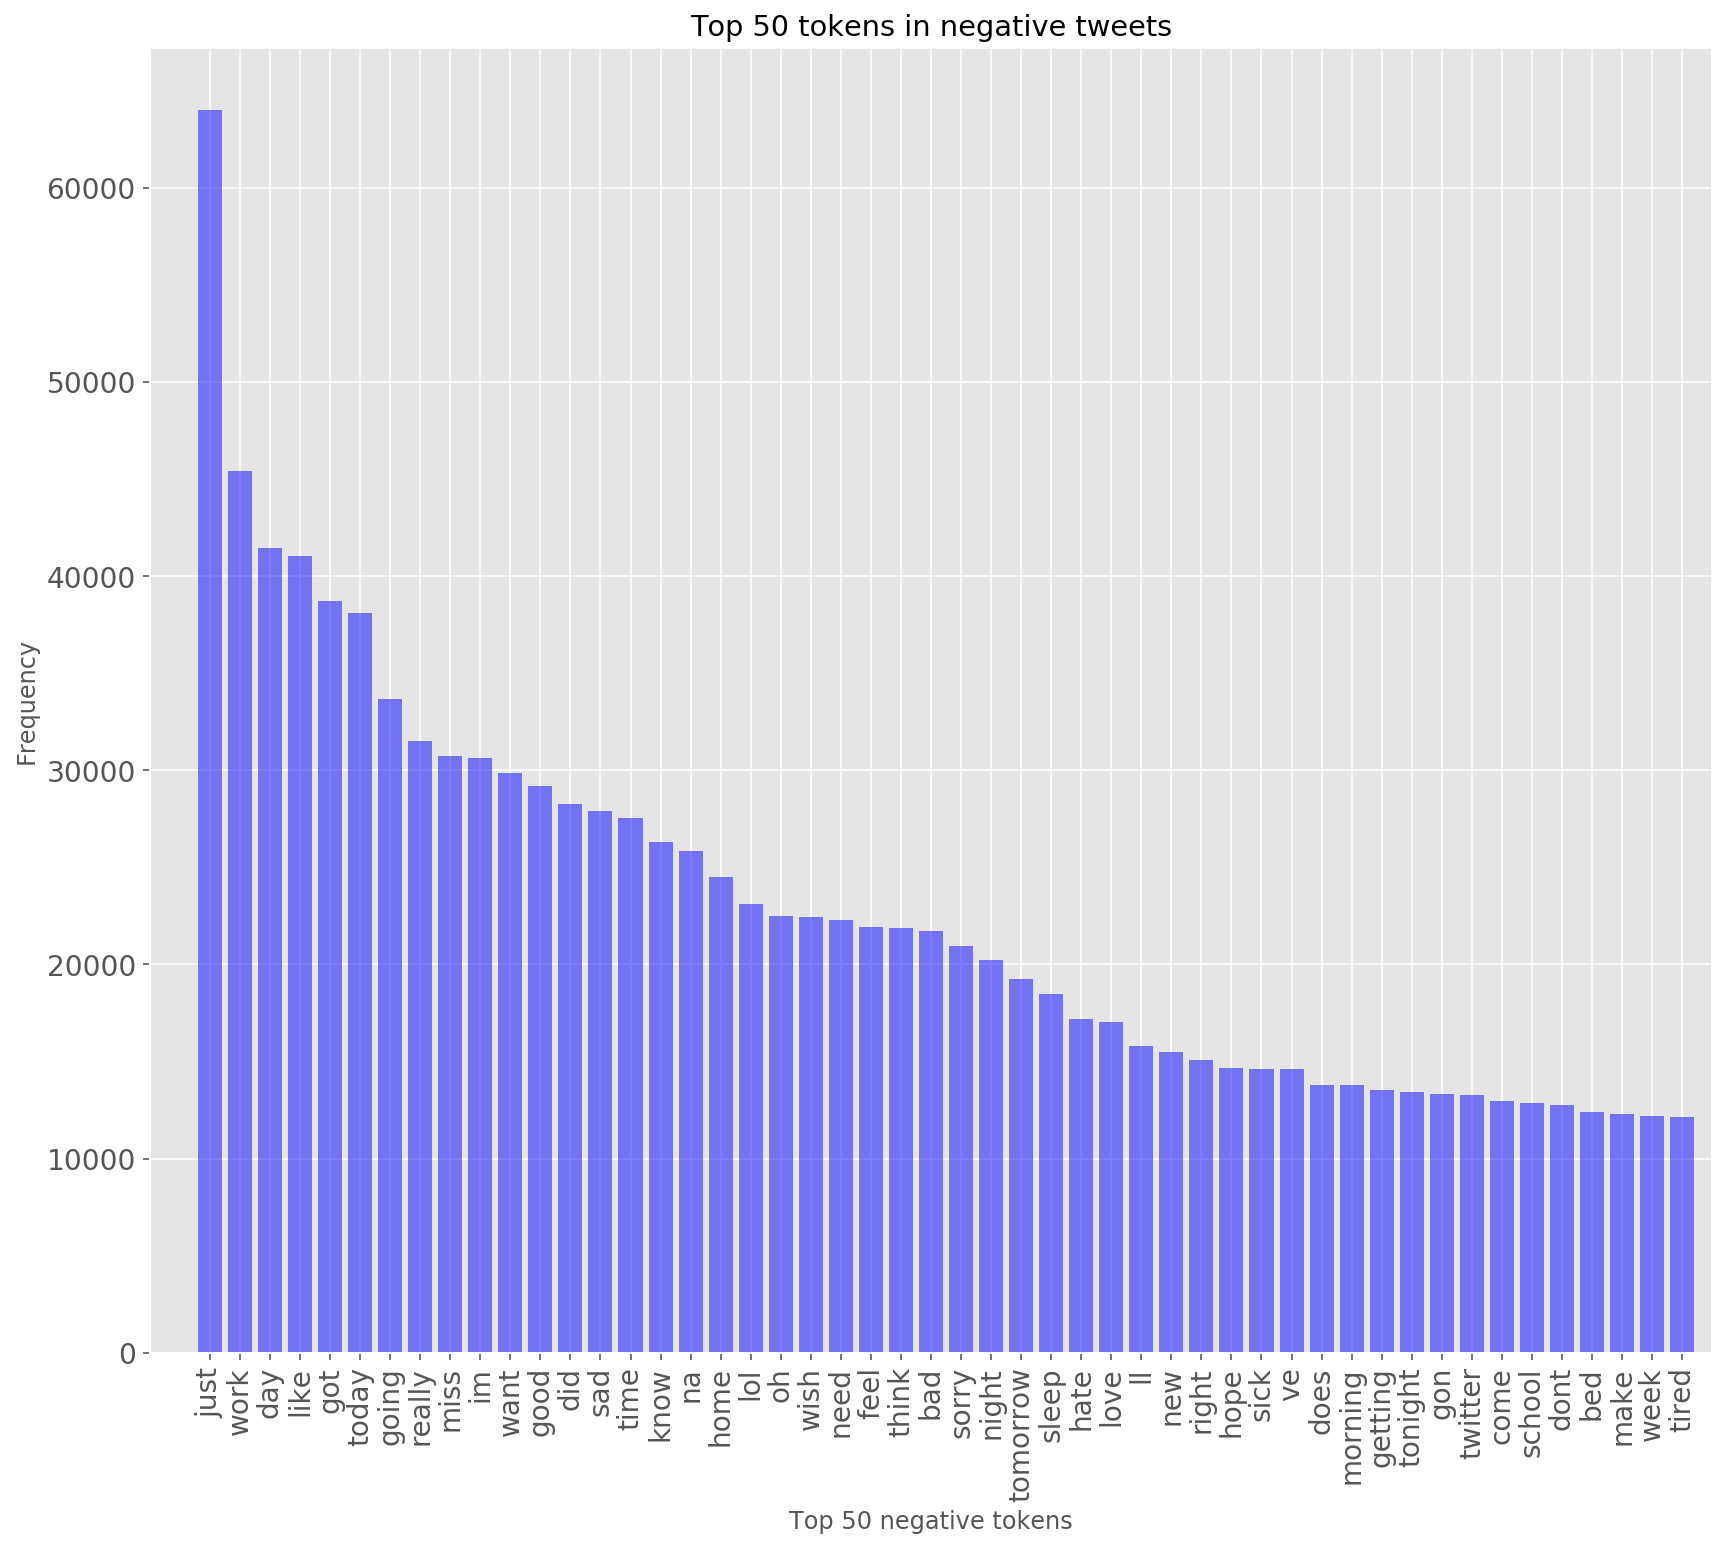

In [108]:
plt.style.use('ggplot')
neg_df = term_freq_df.sort_values(by='negative', ascending=False)
y_pos = np.arange(50)
plt.figure(figsize=(14,12))
plt.bar(y_pos, neg_df['negative'][:50],alpha=0.5, color='blue', align='center')
plt.xlim(-2,50)
plt.xticks(y_pos, neg_df['negative'][:50].index, rotation = 'vertical')
plt.tick_params(labelsize=14)
plt.xlabel('Top 50 negative tokens')
plt.ylabel('Frequency')
plt.title('Top 50 tokens in negative tweets')

The most frequent words like "just", "work", "day", "got", "today" etc. do little to convey negative sentiment. It's difficult to comment about their importance in characterising negative tweets. On the other hand, words like, "miss", "sad", bad", "sorry", "hate" etc. convey clear negative sentiment.

Let's see the top 50 words in positive tweets on a bar chart.

Text(0.5, 1.0, 'Top 50 tokens in positive tweets')

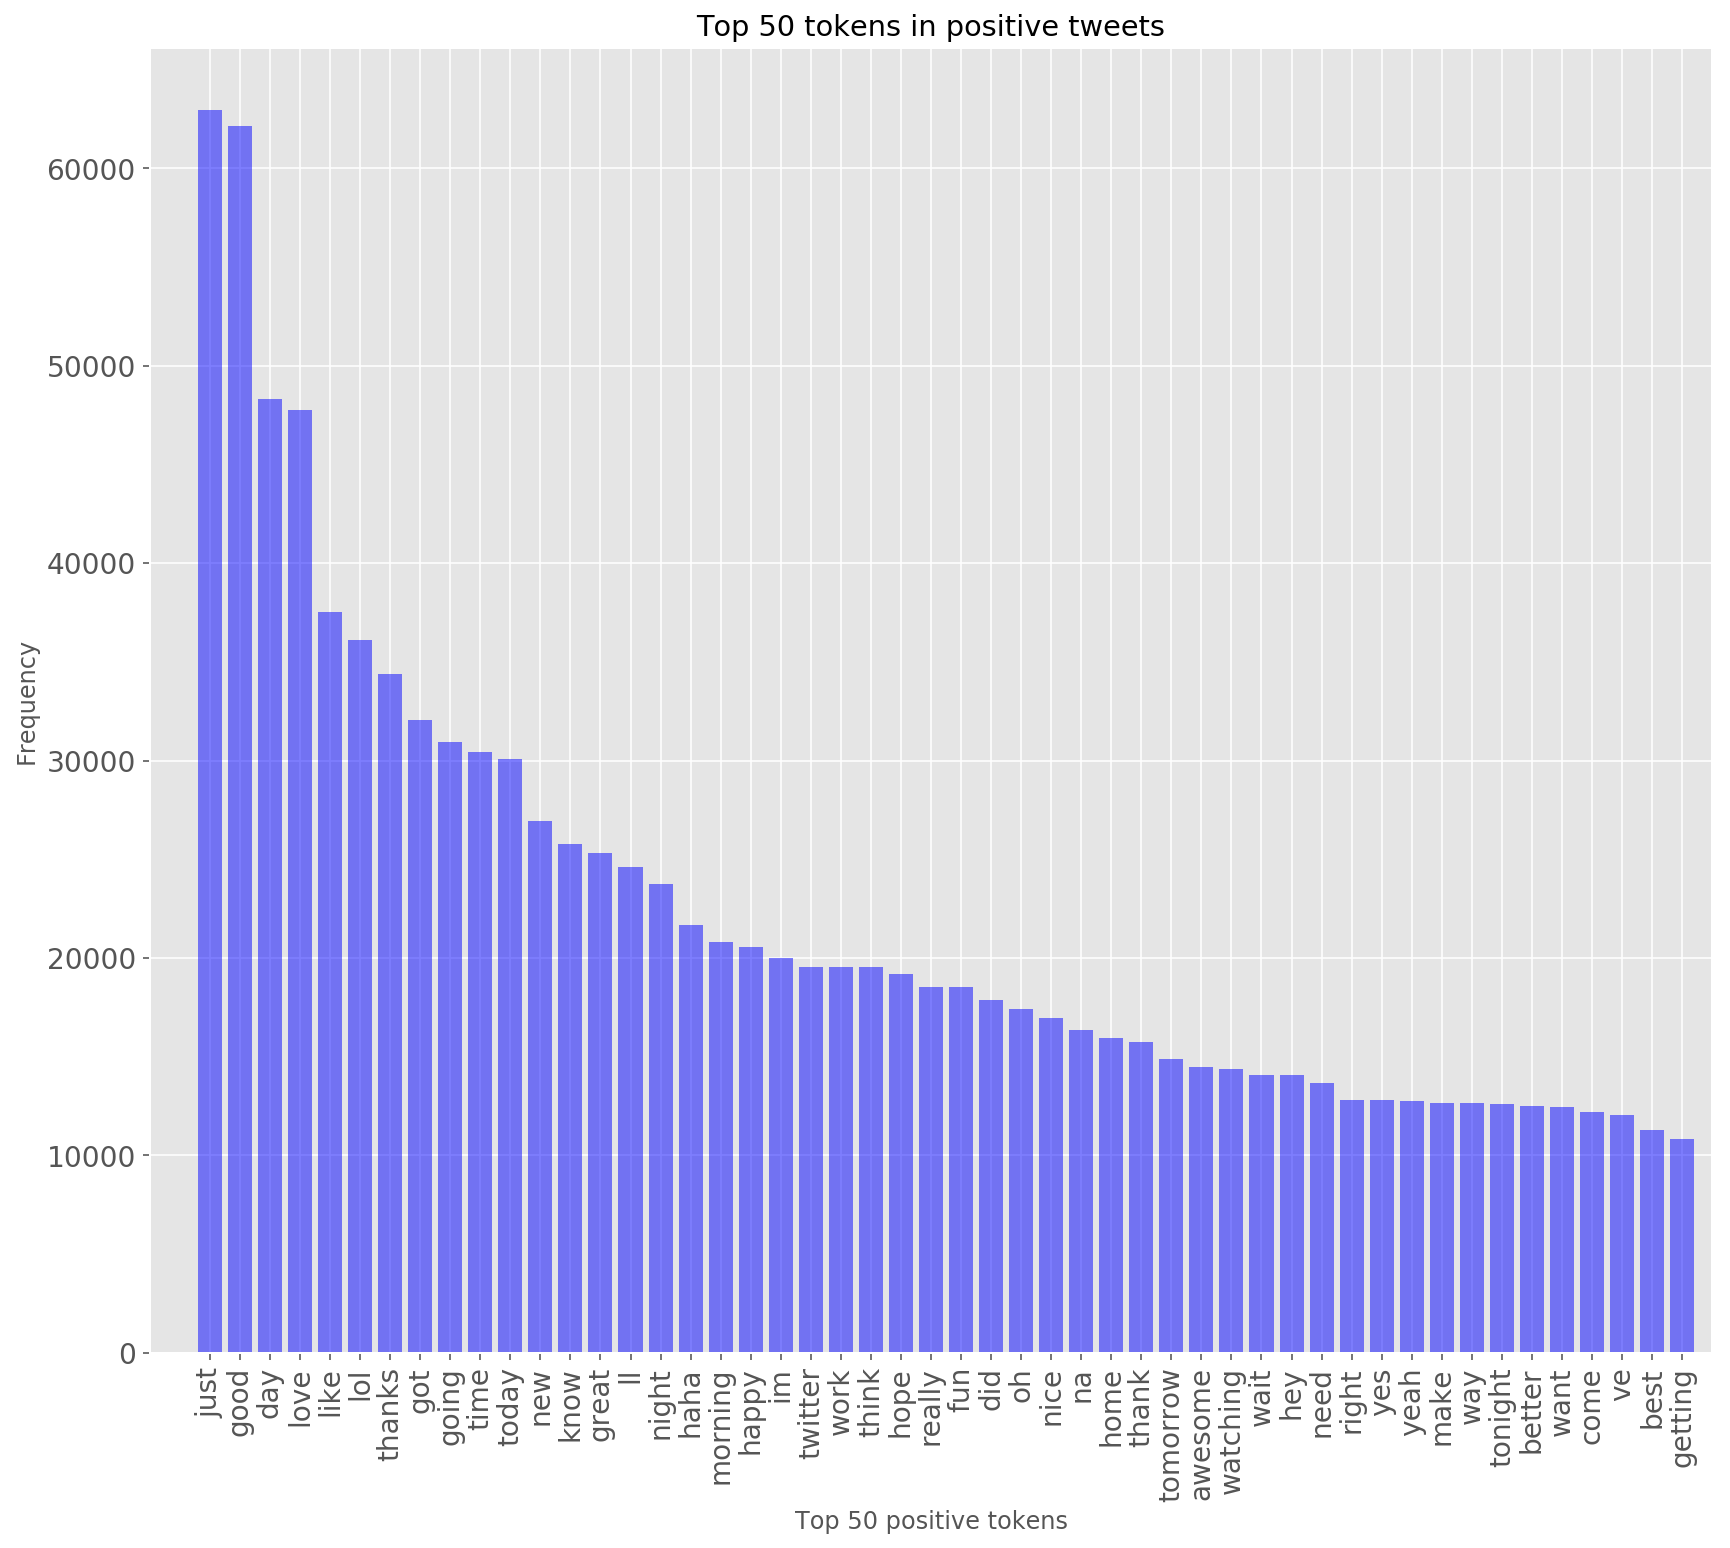

In [109]:
plt.style.use('ggplot')
pos_df = term_freq_df.sort_values(by='positive', ascending=False)
y_pos = np.arange(50)
plt.figure(figsize=(14,12))
plt.bar(y_pos, pos_df['positive'][:50],alpha=0.5, color='blue', align='center')
plt.xlim(-2,50)
plt.xticks(y_pos, pos_df['positive'][:50].index, rotation = 'vertical')
plt.tick_params(labelsize=14)
plt.xlabel('Top 50 positive tokens')
plt.ylabel('Frequency')
plt.title('Top 50 tokens in positive tweets')

The most frequent words like "just", "day", "got", "today", "time" etc. do little to convey positive sentiment. It's difficult to comment about their importance in characterising positive tweets. On the other hand, words like, "good", "love", "like", "thanks", "new" etc. convey clear positive sentiment.

Let's plot the negative frequency of a word on x-axis and the positive frequency on y-axis.

Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

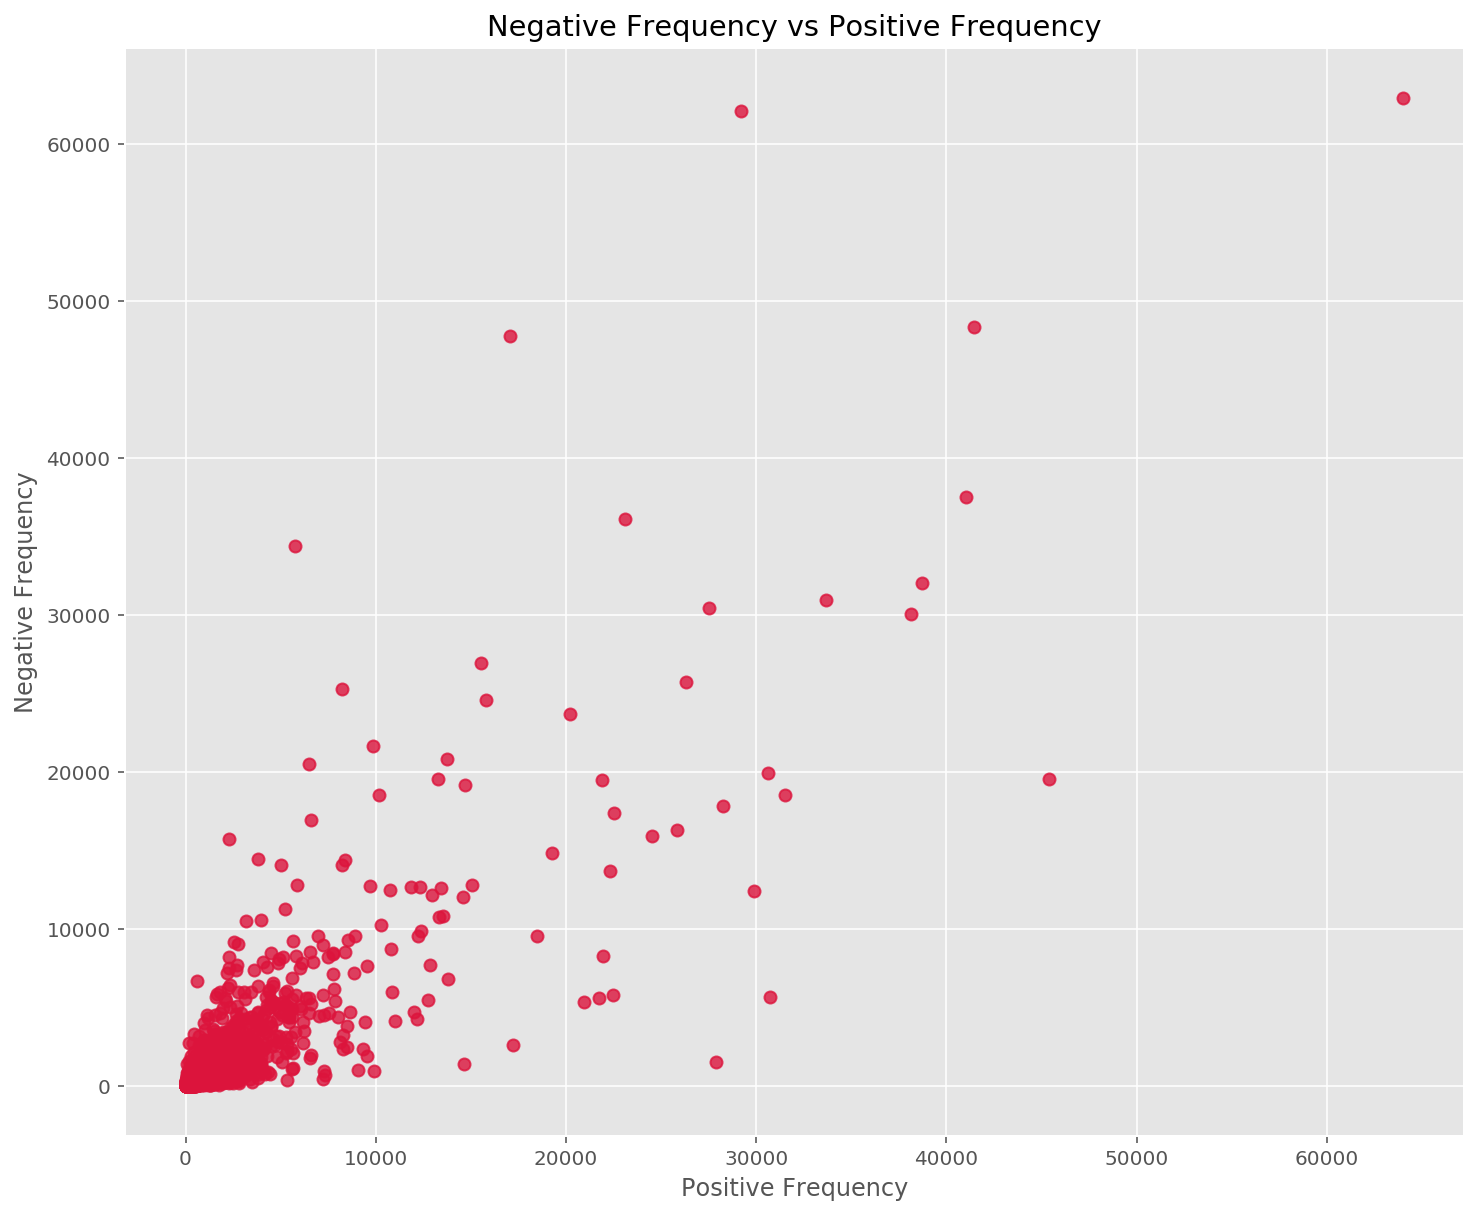

In [110]:
plt.figure(figsize=(12,10))
ax = sns.regplot(x='negative', y='positive', data=term_freq_df, fit_reg=False, color='crimson')
plt.ylabel("Negative Frequency")
plt.xlabel("Positive Frequency")
plt.title("Negative Frequency vs Positive Frequency")

Most of the words are below 10000 on both Y and X-axis, hence, we can find any meaningful relation between positive and negative frequency.

The next metric has been taken from Jason Kessler's talk in Pydata 2017 in Seattle, where he introduced Scattertext.

If a word appears more in one class as compared to the other, we can use it as a measure of how much important the word is to characterise the class. Let's call it posrate.

$$
posrate = \frac{positive frequency}{positive frequency + negative frequency}
$$



In [111]:
term_freq_df['posrate'] = term_freq_df['positive']/term_freq_df['total']

In [112]:
term_freq_df.sort_values(by='posrate', ascending=False).head(10)

,negative,positive,total,posrate
dividends,0,83,83,1.000000
emailunlimited,0,100,100,1.000000
mileymonday,0,161,161,1.000000
shareholder,1,80,81,0.987654
fuzzball,2,99,101,0.980198
recommends,3,109,112,0.973214
delongeday,6,162,168,0.964286
atcha,3,80,83,0.963855
timestamp,3,68,71,0.957746
shaundiviney,4,89,93,0.956989


Words with highest posrate have 0 frequency in negative class. But the frequency of these words is quite low to use them as a measure to characterise positive tweets.

Another metric is the frequency a word occurs in the class. This is defined as

$$
posfreq = \frac{positive frequency}{Σpositive frequency}
$$

In [113]:
term_freq_df['posfreq'] = term_freq_df['positive']/term_freq_df['positive'].sum()

In [114]:
term_freq_df.sort_values(by='posfreq', ascending=False).head(10)

,negative,positive,total,posrate,posfreq
just,64006,62946,126952,0.495825,0.014264
good,29213,62122,91335,0.680155,0.014077
day,41456,48319,89775,0.538223,0.010949
love,17061,47780,64841,0.736879,0.010827
like,41052,37527,78579,0.477570,0.008504
lol,23123,36120,59243,0.609692,0.008185
thanks,5768,34378,40146,0.856324,0.007790
got,38715,32030,70745,0.452753,0.007258
going,33690,30939,64629,0.478717,0.007011
time,27532,30438,57970,0.525065,0.006897


Since posfreq is just the frequency scaled over the total sum of the frequency, the rank of posfreqpct is exactly same as just the positive frequency.

In [115]:
term_freq_df['posfreq'].max()

0.01426404088907219

In [116]:
term_freq_df['posfreq'].min()

0.0

In [117]:
term_freq_df['posrate'].max()

1.0

Now, we need to come up with a metric which combines posrate and posfreq. The range of posrate is 0 to 1. The range os posfreq is 0 to ~0.015. If we take the average of posrate and posfreq, posrate will be too dominant and will not reflect the two metrics properly.

Hence, instead of arithmetic mean, we use harmonic mean. It increases the effect of the small values and reduces the effect of the larger ones. The harmonic mean H of positive real numbers x1, x2,...... xn is defined as

$$
H = \frac{n}{Σ_{i=1}^{n}\frac{1}{x_{i}}}
$$

In [118]:
from scipy import stats

In [119]:
term_freq_df['pos_hmean'] = term_freq_df.apply(lambda x: (stats.hmean([x['posrate'], x['posfreq']])
                                          if x['posrate']>0 and x['posfreq']>0 else 0), axis=1)

In [120]:
term_freq_df.sort_values(by='pos_hmean', ascending=False).head(10)

,negative,positive,total,posrate,posfreq,pos_hmean
just,64006,62946,126952,0.495825,0.014264,0.027730
good,29213,62122,91335,0.680155,0.014077,0.027584
day,41456,48319,89775,0.538223,0.010949,0.021462
love,17061,47780,64841,0.736879,0.010827,0.021341
like,41052,37527,78579,0.477570,0.008504,0.016710
lol,23123,36120,59243,0.609692,0.008185,0.016153
thanks,5768,34378,40146,0.856324,0.007790,0.015440
got,38715,32030,70745,0.452753,0.007258,0.014287
going,33690,30939,64629,0.478717,0.007011,0.013820
time,27532,30438,57970,0.525065,0.006897,0.013616


The harmonic mean rank seems just like the posfreq rank. Here, the impact of the posfreq significantly increased and dominated the mean value. Hence, we still can't come to a meaningful conclusion.

Now, we will try the Cumulative Disbrituion Function. The cumulative distribution function (CDF) of a real-valued random variable X, evaluated at x, is the probability that X will take a value less than or equal to x. Now, we do calculate harmonic mean of these 2 CDF values. 

In [121]:
def normcdf(x):
    return stats.norm.cdf(x, x.mean(), x.std()) #x is variable, x.mean() is mean and x.std() is standard deviation

In [122]:
term_freq_df['posrate_cdf'] = normcdf(term_freq_df['posrate'])

In [123]:
term_freq_df['posfreq_cdf'] = normcdf(term_freq_df['posfreq'])

In [124]:
term_freq_df['pos_hmean_cdf'] = stats.hmean([term_freq_df['posrate_cdf'], term_freq_df['posfreq_cdf']])

In [126]:
term_freq_df.sort_values(by='pos_hmean_cdf', ascending=False).head(10)

,negative,positive,total,posrate,posfreq,pos_hmean,posrate_cdf,posfreq_cdf,pos_hmean_cdf
welcome,620,6702,7322,0.915324,0.001519,0.003032,0.995710,0.999312,0.997508
thank,2282,15737,18019,0.873356,0.003566,0.007103,0.990923,1.000000,0.995441
thanks,5768,34378,40146,0.856324,0.007790,0.015440,0.987920,1.000000,0.993923
awesome,3829,14475,18304,0.790811,0.003280,0.006533,0.967084,1.000000,0.983266
glad,2273,8255,10528,0.784100,0.001871,0.003732,0.963836,0.999967,0.981569
follow,2553,9154,11707,0.781925,0.002074,0.004138,0.962729,0.999996,0.981009
enjoy,1642,5876,7518,0.781591,0.001332,0.002659,0.962556,0.997262,0.979602
sweet,1621,5653,7274,0.777151,0.001281,0.002558,0.960202,0.996135,0.977838
yay,3171,10508,13679,0.768185,0.002381,0.004748,0.955079,1.000000,0.977023
hi,2176,7219,9395,0.768387,0.001636,0.003265,0.955200,0.999734,0.976960


Now, we apply this calculation to the negative class of each word.

In [127]:
term_freq_df['negrate'] = term_freq_df['negative']/term_freq_df['total']
term_freq_df['negfreq'] = term_freq_df['negative']/term_freq_df['negative'].sum()
term_freq_df['neg_hmean'] = term_freq_df.apply(lambda x: (stats.hmean([x['negrate'], x['negfreq']])
                                          if x['negrate']>0 and x['negfreq']>0 else 0), axis=1)

In [128]:
term_freq_df['negrate_cdf'] = normcdf(term_freq_df['negrate'])
term_freq_df['negfreq_cdf'] = normcdf(term_freq_df['negfreq'])
term_freq_df['neg_hmean_cdf'] = stats.hmean([term_freq_df['negrate_cdf'], term_freq_df['negfreq_cdf']])

In [129]:
term_freq_df.sort_values(by='neg_hmean_cdf', ascending=False).head(10)

,negative,positive,total,posrate,posfreq,pos_hmean,posrate_cdf,posfreq_cdf,pos_hmean_cdf,negrate,negfreq,neg_hmean,negrate_cdf,negfreq_cdf,neg_hmean_cdf
sad,27911,1510,29421,0.051324,0.000342,0.000680,0.002221,0.707535,0.004428,0.948676,0.006038,0.012000,0.997779,1.000000,0.998888
hurts,7204,456,7660,0.059530,0.000103,0.000206,0.002611,0.502999,0.005196,0.940470,0.001558,0.003112,0.997389,0.999690,0.998538
sick,14620,1420,16040,0.088529,0.000322,0.000641,0.004537,0.691533,0.009014,0.911471,0.003163,0.006304,0.995463,1.000000,0.997726
sucks,9902,982,10884,0.090224,0.000223,0.000444,0.004681,0.608859,0.009291,0.909776,0.002142,0.004274,0.995319,0.999999,0.997653
poor,7333,719,8052,0.089295,0.000163,0.000325,0.004602,0.556433,0.009128,0.910705,0.001586,0.003167,0.995398,0.999757,0.997573
ugh,9056,1000,10056,0.099443,0.000227,0.000452,0.005541,0.612387,0.010982,0.900557,0.001959,0.003910,0.994459,0.999994,0.997219
missing,7282,991,8273,0.119787,0.000225,0.000448,0.007949,0.610624,0.015694,0.880213,0.001575,0.003145,0.992051,0.999732,0.995877
hate,17208,2618,19826,0.132049,0.000593,0.001181,0.009809,0.867034,0.019398,0.867951,0.003723,0.007414,0.990191,1.000000,0.995071
headache,5317,421,5738,0.073371,0.000095,0.000191,0.003412,0.495863,0.006778,0.926629,0.001150,0.002298,0.996588,0.993145,0.994863
miss,30737,5710,36447,0.156666,0.001294,0.002567,0.014717,0.996457,0.029005,0.843334,0.006649,0.013195,0.985283,1.000000,0.992587


Plotting pos_hmean (Y-axis) vs neg_hmean (X-axis):

Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

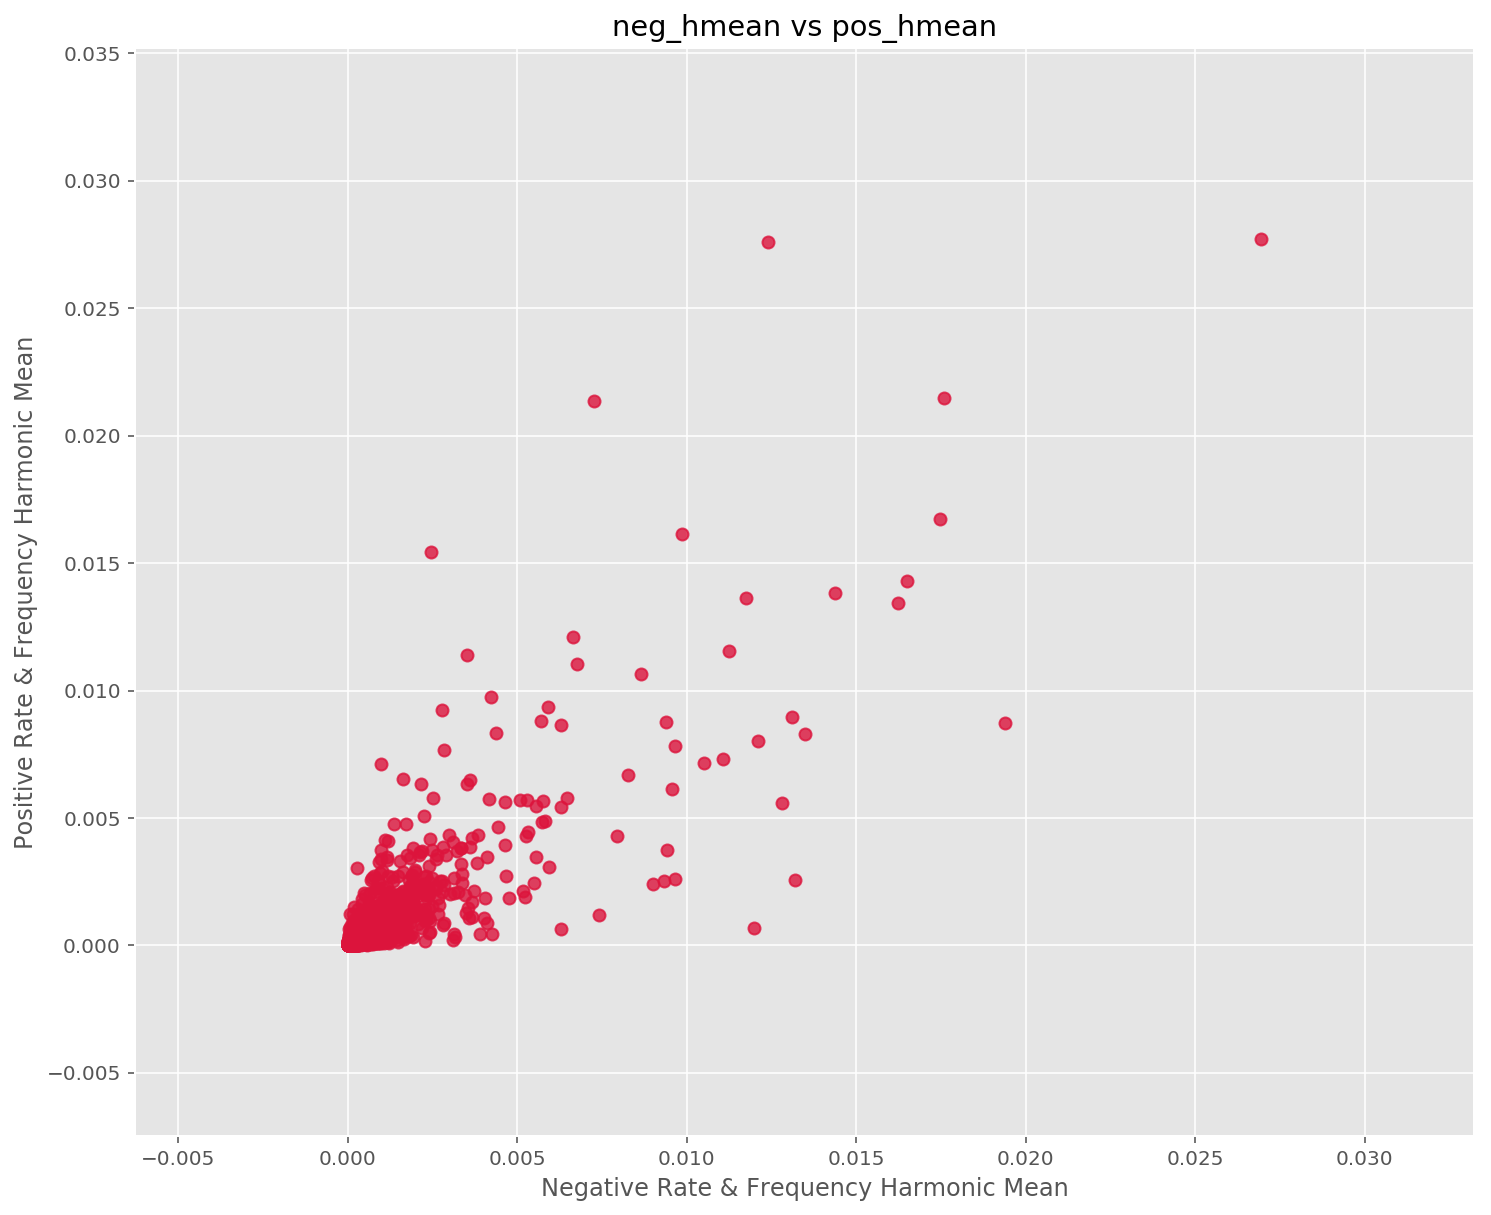

In [130]:
plt.figure(figsize=(12,10))
ax = sns.regplot(x='neg_hmean', y='pos_hmean', data=term_freq_df, fit_reg=False, color='crimson')
plt.ylabel("Positive Rate & Frequency Harmonic Mean")
plt.xlabel("Negative Rate & Frequency Harmonic Mean")
plt.title("neg_hmean vs pos_hmean")

After plotting neg_hmean_cdf (X-axis) vs pos_hmean_cdf (Y-axis), we find that if a data point is near the upper left, it is more positive. And if a data point is near the bottom right, it is more negative.

Text(0.5, 1.0, 'neg_hmean_cdf vs pos_hmean_cdf')

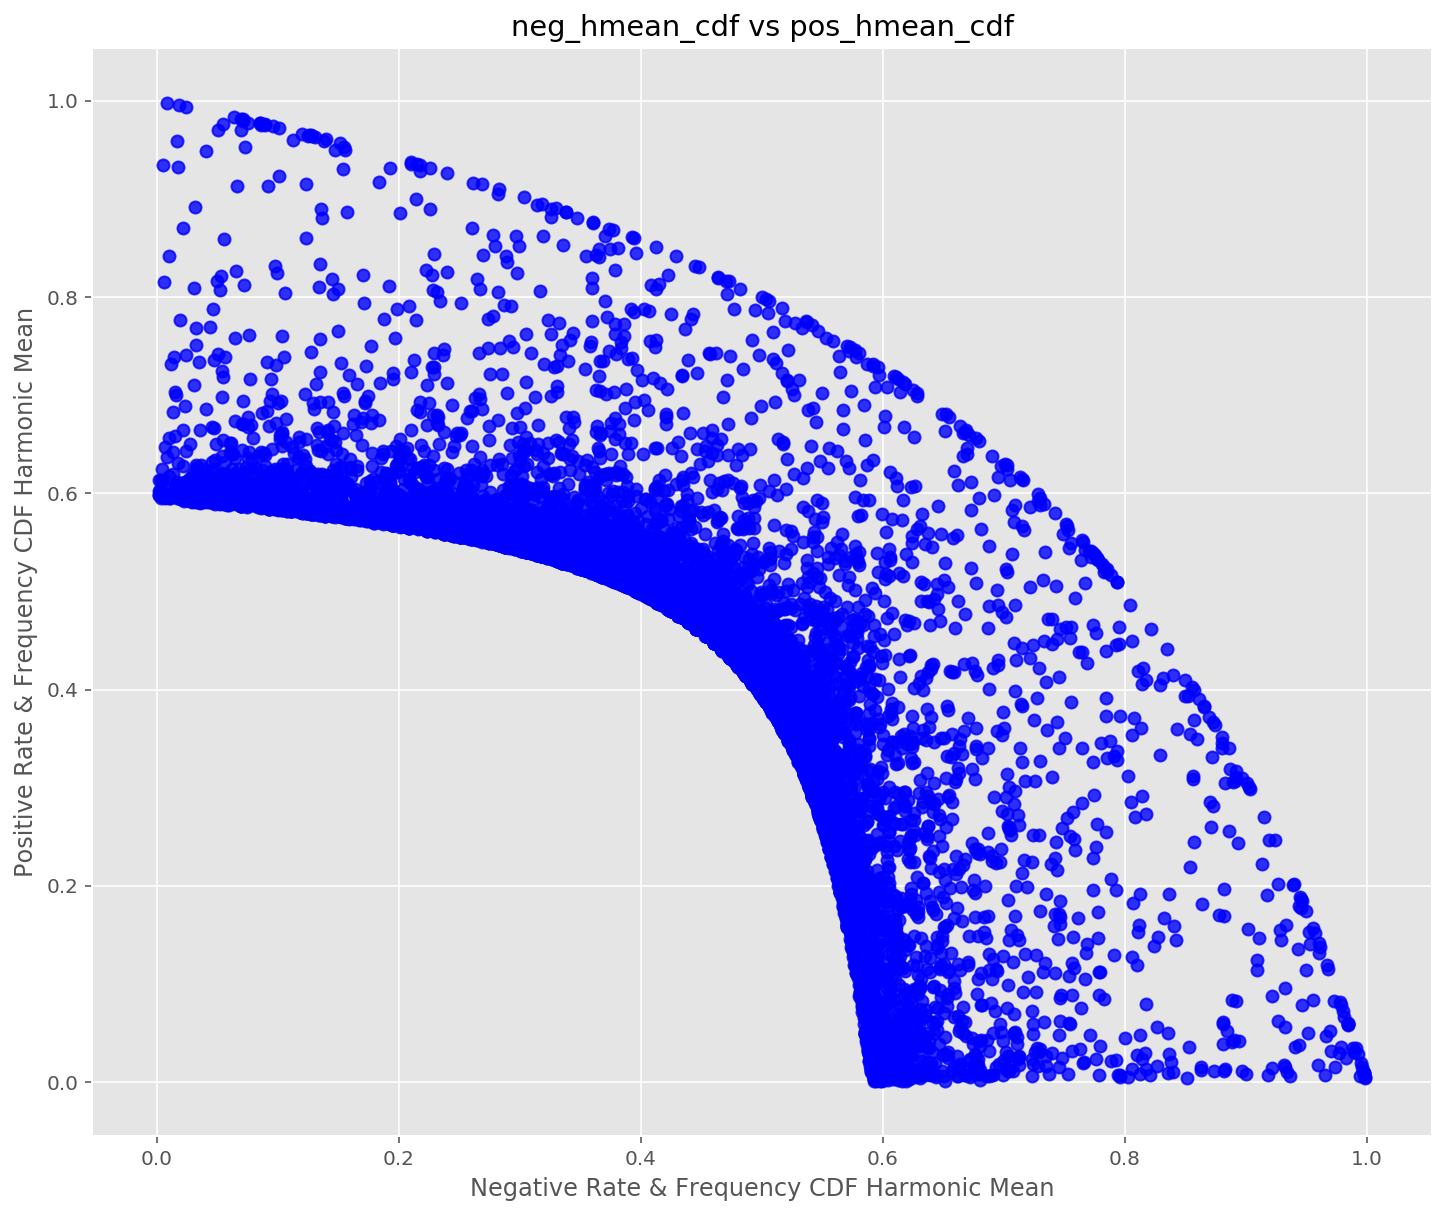

In [133]:
plt.figure(figsize=(12,10))
ax = sns.regplot(x='neg_hmean_cdf', y='pos_hmean_cdf', data=term_freq_df, fit_reg=False, color='blue')
plt.ylabel("Positive Rate & Frequency CDF Harmonic Mean")
plt.xlabel("Negative Rate & Frequency CDF Harmonic Mean")
plt.title("neg_hmean_cdf vs pos_hmean_cdf")